In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [5]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (64,64))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


In [0]:
images_test=[]

for i in test_images:
  image=cv2.imread(filepath_test+i)
  image=cv2.resize(image , (64,64))
  images_test.append(image) 

In [0]:
images_test[0]

In [0]:
images[0]

In [10]:
print(type(images))
print(type(images_test))

<class 'list'>
<class 'list'>


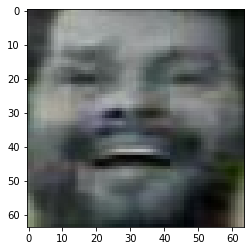

In [11]:
plt.imshow(images[0])

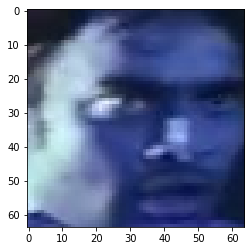

In [12]:
plt.imshow(images[1])

In [13]:
df_train.tail()

,ID,Class
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE
19905,9896.jpg,MIDDLE


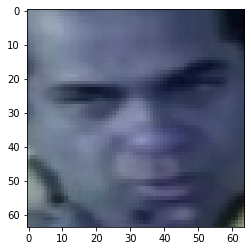

In [14]:
plt.imshow(images[-1])

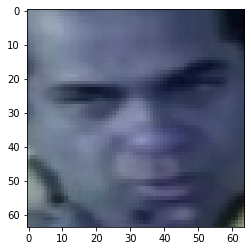

In [15]:
plt.imshow(images[19905])

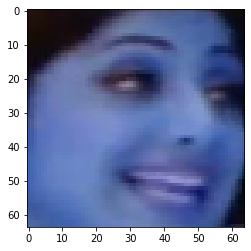

In [16]:
plt.imshow(images[19904])

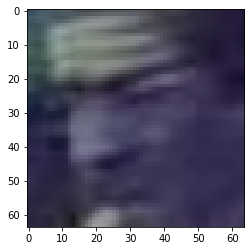

In [17]:
plt.imshow(images_test[0])

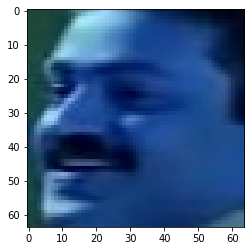

In [18]:
plt.imshow(images_test[-1])

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

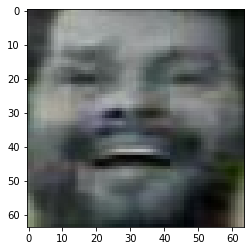

In [20]:
plt.imshow(images[0])

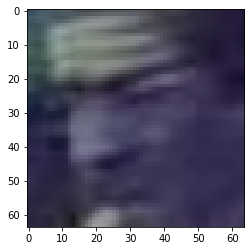

In [21]:
plt.imshow(images_test[0])

In [0]:
images[0]

In [0]:
images_test[0]

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=6)

In [25]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(13934, 64, 64, 3)
<class 'numpy.ndarray'>
(13934,)
<class 'numpy.ndarray'>
(5972, 64, 64, 3)
<class 'numpy.ndarray'>
(5972,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [27]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))


In [0]:
INIT_LR = 0.01 
EPOCHS = 50
BS = 32

opt=SGD(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.1,horizontal_flip=True, fill_mode="nearest")

In [31]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/50
435/435 [==============================] - 32s 74ms/step - loss: 1.1723 - accuracy: 0.5110 - val_loss: 1.0352 - val_accuracy: 0.5541
Epoch 2/50
435/435 [==============================] - 25s 57ms/step - loss: 0.8727 - accuracy: 0.6098 - val_loss: 0.7861 - val_accuracy: 0.6705
Epoch 3/50
435/435 [==============================] - 25s 57ms/step - loss: 0.8166 - accuracy: 0.6334 - val_loss: 0.7578 - val_accuracy: 0.6616
Epoch 4/50
435/435 [==============================] - 25s 56ms/step - loss: 0.7965 - accuracy: 0.6483 - val_loss: 0.7240 - val_accuracy: 0.6896
Epoch 5/50
435/435 [==============================] - 24s 55ms/step - loss: 0.7788 - accuracy: 0.6554 - val_loss: 0.9071 - val_accuracy: 0.6164
Epoch 6/50
435/435 [==============================] - 24s 56ms/step - loss: 0.7649 - accuracy: 0.6629 - val_loss: 0.7116 - val_accuracy: 0.6842
Epoch 7/50
435/435 [==============================] - 24s 55ms/step - loss: 0.7465 - accuracy: 0.6732 - val_loss: 0.7490 - val_accuracy:

In [32]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.82      0.88      0.85      3183
         OLD       0.76      0.64      0.69       692
       YOUNG       0.84      0.81      0.82      2097

    accuracy                           0.82      5972
   macro avg       0.81      0.77      0.79      5972
weighted avg       0.82      0.82      0.82      5972



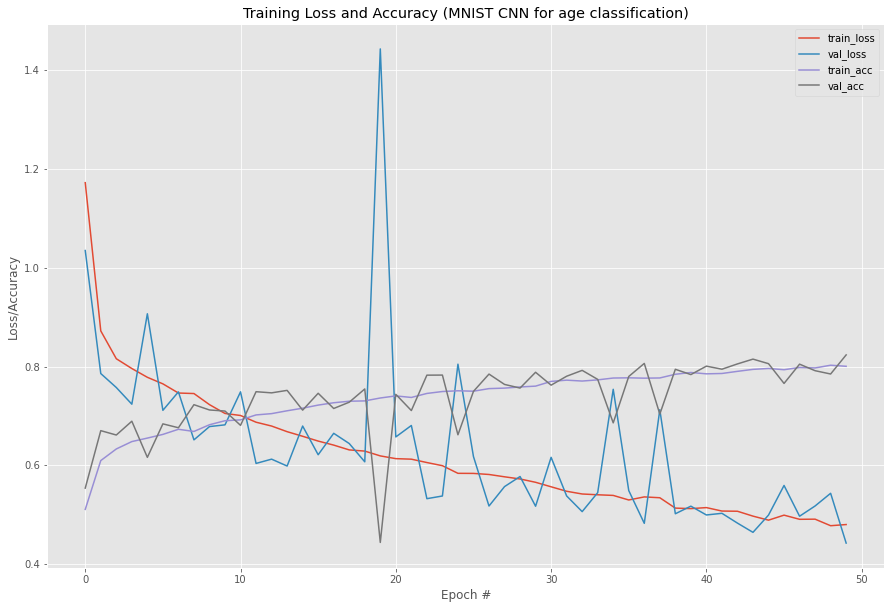

In [33]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [0]:
model.save('cnn_age_classif.model')

In [0]:
from google.colab import files
files.download('cnn_age_classif.model')

In [36]:
pred = model.predict(images_test)
pred

array([[3.56356025e-01, 5.70214331e-01, 7.34296516e-02],
       [9.21397865e-01, 1.86192789e-04, 7.84159303e-02],
       [5.88548779e-01, 1.83289719e-03, 4.09618318e-01],
       ...,
       [1.54587505e-02, 7.91549028e-05, 9.84462023e-01],
       [1.24478064e-01, 5.34420658e-04, 8.74987543e-01],
       [9.94812131e-01, 6.40532060e-04, 4.54741158e-03]], dtype=float32)

In [38]:
i = pred.argmax(axis=1)
i

array([1, 0, 0, ..., 2, 2, 0])

In [39]:
#Going for first test example
i0 = pred.argmax(axis=1)[0]
i0

1

In [41]:
vals = np.amax(pred, axis=1)
vals

array([0.57021433, 0.92139786, 0.5885488 , ..., 0.984462  , 0.87498754,
       0.99481213], dtype=float32)

In [42]:
#going for first test example
val0 = vals[0]
val0

0.57021433

In [44]:
#first test example
perc_val0 = val0*100
perc_val0 = perc_val0.round(2)
perc_val0

57.02

In [0]:
from google.colab.patches import cv2_imshow

In [49]:
label0 = lb.classes_[i0]
label0

'OLD'

In [0]:
#SEE THIS 
#need to fix this 
output = images_test[0].copy()

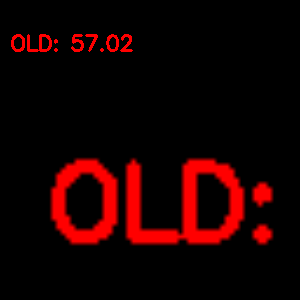

In [51]:
text = label0+": "+str(perc_val0)
#text='theri'

cv2.putText(output, text , (10,50),  cv2.FONT_HERSHEY_SIMPLEX, 0.7 ,(0, 0, 255), 2)
output = cv2.resize(output , (300,300))

# show the output image

cv2_imshow(output)

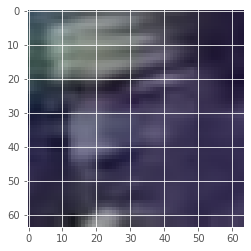

In [52]:
plt.imshow(images_test[0])